<a href="https://colab.research.google.com/github/Ashwinabj/Weather-Image-Recognition/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
import zipfile

In [3]:
local_zip='/tmp/Weather-Data.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/Weather-Data')
zip_ref.close()

In [4]:
train_cloudy_dir=os.path.join('/tmp/Weather-Data/cloudy')
train_rain_dir=os.path.join('/tmp/Weather-Data/rain')
train_shine_dir=os.path.join('/tmp/Weather-Data/shine')
train_sunrise_dir=os.path.join('/tmp/Weather-Data/sunrise')

In [5]:
print(os.listdir(train_cloudy_dir)[:5])
print(os.listdir(train_rain_dir)[:5])
print(os.listdir(train_shine_dir)[:5])
print(os.listdir(train_sunrise_dir)[:5])

['cloudy101.jpg', 'cloudy17.jpg', 'cloudy10.jpg', 'cloudy51.jpg', 'cloudy178.jpg']
['rain192.jpg', 'rain172.jpg', 'rain202.jpg', 'rain128.jpg', 'rain169.jpg']
['shine229.jpg', 'shine237.jpg', 'shine56.jpg', 'shine1.jpg', 'shine93.jpg']
['sunrise167.jpg', 'sunrise58.jpg', 'sunrise63.jpg', 'sunrise137.jpg', 'sunrise115.jpg']


In [6]:
print(len(os.listdir(train_cloudy_dir)[:]))
print(len(os.listdir(train_rain_dir)[:]))
print(len(os.listdir(train_shine_dir)[:]))
print(len(os.listdir(train_sunrise_dir)[:]))

300
215
253
357


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
nrows=4
ncols=4

In [10]:
pic_index=0

In [11]:
fig=plt.gcf()

<Figure size 432x288 with 0 Axes>

In [12]:
fig.set_size_inches(ncols*4,nrows*4)

In [13]:
train_cloudy_names=os.listdir(train_cloudy_dir)
train_rain_names=os.listdir(train_rain_dir)
train_shine_names=os.listdir(train_shine_dir)
train_sunrise_names=os.listdir(train_sunrise_dir)

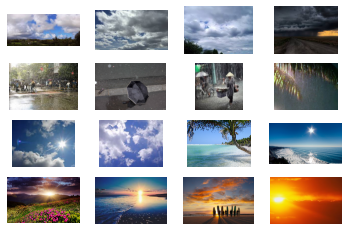

In [14]:
pic_index += 4
next_cloudy_pix = [os.path.join(train_cloudy_dir, fname) 
                for fname in train_cloudy_names[pic_index-4:pic_index]]
next_rain_pix = [os.path.join(train_rain_dir, fname) 
                for fname in train_rain_names[pic_index-4:pic_index]]
next_shine_pix = [os.path.join(train_shine_dir, fname) 
                for fname in train_shine_names[pic_index-4:pic_index]]
next_sunrise_pix = [os.path.join(train_sunrise_dir, fname) 
                for fname in train_sunrise_names[pic_index-4:pic_index]]                                

for i, img_path in enumerate(next_cloudy_pix+next_rain_pix+next_shine_pix+next_sunrise_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [15]:
import tensorflow as tf

In [16]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(4,activation='sigmoid')

])

In [17]:
model.summary()
class_names=['cloudy','rain','shine','sunrise']

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [18]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255,
                                 validation_split=0.2)

train_generator=train_datagen.flow_from_directory(
    '/tmp/Weather-Data/',
    target_size=(300,300),
    class_mode='categorical',
    subset='training'
)

validation_generator=train_datagen.flow_from_directory(
     '/tmp/Weather-Data/',
     target_size=(300,300),
     class_mode='categorical',
     subset='validation'
)


Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [20]:
history=model.fit(
    train_generator,
    epochs=10,
    verbose=2
)

Epoch 1/10
29/29 - 83s - loss: 0.8557 - accuracy: 0.6193
Epoch 2/10
29/29 - 82s - loss: 0.2687 - accuracy: 0.7969
Epoch 3/10
29/29 - 81s - loss: 0.2191 - accuracy: 0.8224
Epoch 4/10
29/29 - 81s - loss: 0.1865 - accuracy: 0.8613
Epoch 5/10
29/29 - 81s - loss: 0.1674 - accuracy: 0.8724
Epoch 6/10
29/29 - 81s - loss: 0.1316 - accuracy: 0.9034
Epoch 7/10
29/29 - 81s - loss: 0.1056 - accuracy: 0.9301
Epoch 8/10
29/29 - 82s - loss: 0.0860 - accuracy: 0.9378
Epoch 9/10
29/29 - 81s - loss: 0.1035 - accuracy: 0.9367
Epoch 10/10
29/29 - 81s - loss: 0.0759 - accuracy: 0.9512


In [21]:
result1=model.evaluate(train_generator)
result2=model.evaluate(validation_generator)
print(result1[1]*100,result2[1]*100)

7/7 [==============================] - 7s 916ms/step - loss: 0.1900 - accuracy: 0.8661
99.66703653335571 86.60714030265808


Saving rain.jpg to rain (2).jpg


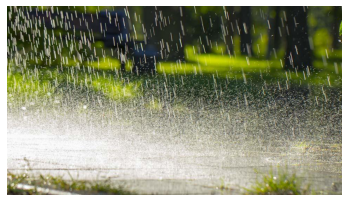

This is an image of rain


In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn

  sp = plt.subplot(1,1,1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(path)
  plt.imshow(img)

  plt.show()

  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print("This is an image of "+class_names[np.argmax(classes)])